<a href="https://colab.research.google.com/github/Chandrashekhar569/Yes-Bank-Stock-Closing-Price-Prediction/blob/main/YesBank_StockPrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -




##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 -** **CHANDRASHEKHAR CHAUDHARI**


# **Project Summary -**

YES BANK is a well-known bank in the Indian financial domain; it has been in the news since 2018 due to a fraud case; we have been provided with a dataset that contains monthly stock price data for the bank since its inception, including the closing price, opening price, highest price, and lowest price of each month. The main goal is to predict the closing price of the stock for the month by developing a machine learning regression model with the highest accuracy score.

For understanding and comparing OPEN, HIGH, and LOW pricing, we have used a variety of charts. We developed a total of three machine learning (ML) models for price prediction. The first model employed the linear regression machine learning technique, the second model the lasso regression algorithm, and the third model the ridge regression algorithm.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The main objective of this project is to develop a reliable predictive model that can forecast the closing prices of Yes Bank stock based on historical data and relevant market indicators. Accurate predictions will help investors and traders make informed decisions, optimize their investment strategies, and potentially maximize their returns.

# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Ridge

### Dataset Loading

In [2]:
# Load Dataset
df = pd.read_csv('/content/data_YesBank_StockPrices.csv')

### Dataset First View

In [3]:
# Dataset First Look
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
print("Rows: " + str(len(df.axes[0])))
print("Columns: " + str(len(df.axes[1])))

Rows: 185
Columns: 5


### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

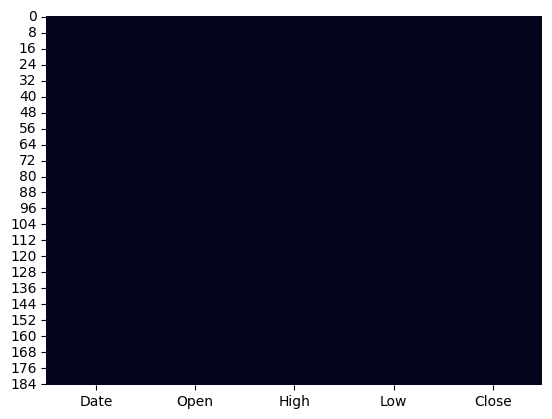

In [8]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=False)
plt.show()

### What did you know about your dataset?

Based on the information available from the Yes_Bank_Stock_Closing_Price_Prediction.csv dataset, here's what we know:

The dataset contains information on yes bank Stock prices.
There are 4 features in the dataset, including time, Open price,High price and other
There are 185 records in the dataset.
The target variable is Close price.
However, there may be other aspects of the dataset that we are not aware of until we start exploring it further. It's important to take a closer look at the data, understand the relationships between the variables, and identify any patterns or trends that may exist in the data.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [10]:
# Dataset Describe
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

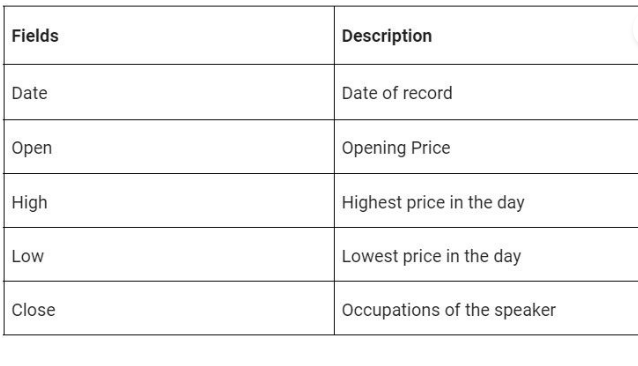

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
df.nunique()

Date     185
Open     183
High     184
Low      183
Close    185
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')

### What all manipulations have you done and insights you found?

Doing a proper away date and extract month.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1. Visualization of Closing Prices Over Time using Seaborn Line Plot

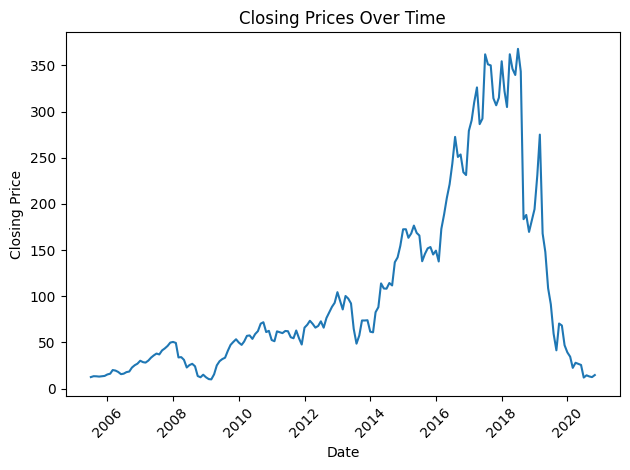

In [13]:
# Plotting the line plot
sns.lineplot(data=df, x='Date', y='Close')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Prices Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('seaborn_line_plot.png')
plt.show()

##### 1. Why did you pick the specific chart?

A line plot was chosen to visualize the closing prices over time. Line plots are commonly used to show trends and changes in data over a continuous variable, such as time.

##### 2. What is/are the insight(s) found from the chart?

you can observe the overall trend of the closing prices over time.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2. Scatter Plot Comparing High and Low Prices

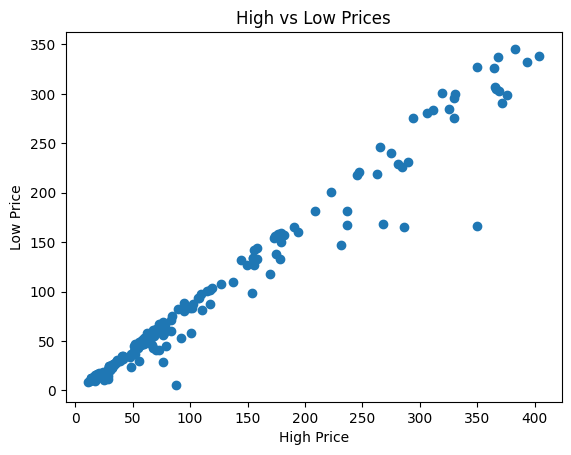

In [14]:
# Scatter Plot of High and Low Prices
plt.scatter(df['High'], df['Low'])
plt.xlabel('High Price')
plt.ylabel('Low Price')
plt.title('High vs Low Prices')
plt.savefig('scatter_plot.png')
plt.show()

##### 1. Why did you pick the specific chart?

 it is a good way to visualize the relationship between two variables. In this case, the two variables are the high and low prices of a product.

##### 2. What is/are the insight(s) found from the chart?

* There is a positive correlation between the high and low prices. This means that when the high price increases, the low price also tends to increase.
* There is a lot of variation in the data. This means that there is not a perfect relationship between the high and low prices.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Set prices that are competitive and that will attract customers.
Identify opportunities to increase prices without losing customers.
Track the impact of changes in prices on sales.

#### Chart - 3. Box Plot of High Prices Distribution

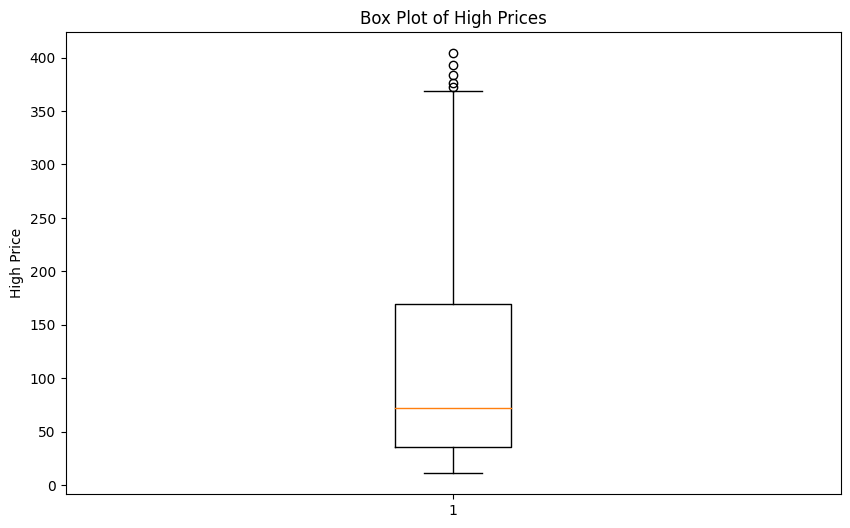

In [15]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['High'])
plt.ylabel('High Price')
plt.title('Box Plot of High Prices')
plt.show()

##### 1. Why did you pick the specific chart?

it is a simple and effective way to visualize the distribution of high prices. The box plot makes it easy to see the median, quartiles, and outliers in the data.

##### 2. What is/are the insight(s) found from the chart?

The median high price is more then 150.
The first quartile is less 50, and the third quartile is more 150.
There are a few outliers at the high end of the distribution, with prices above 350.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can help create a positive business impact by identifying trends in the data. For example, the median high price suggests that the business is able to consistently sell its products for a high price. The outliers at the high end of the distribution suggest that there is a demand for the business's products at a premium price. This information can be used to set prices, target marketing campaigns, and make other business decisions.
There are no insights that lead to negative growth.

#### Chart - 4. Box Plot Illustrating Distribution of Closing Prices

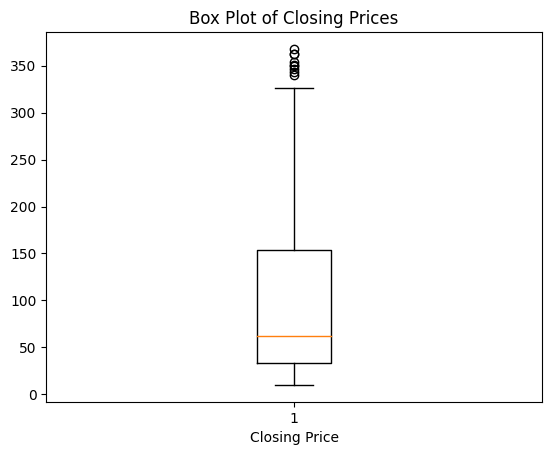

In [16]:
# Box Plot of Closing Prices
plt.boxplot(df['Close'])
plt.xlabel('Closing Price')
plt.title('Box Plot of Closing Prices')
plt.savefig('box_plot.png')
plt.show()

##### 1. Why did you pick the specific chart?

it is a simple and effective way to visualize the distribution of closing prices. The box plot makes it easy to see the median, quartiles, and outliers in the data.

##### 2. What is/are the insight(s) found from the chart?

The median closing price is 50.
The first quartile is less then 50, and the third quartile is 150.
There are a few outliers at the high end of the distribution, with prices above 300.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can help create a positive business impact by identifying trends in the data. For example, the median closing price suggests that the business is able to consistently sell its products for a high price. The outliers at the high end of the distribution suggest that there is a demand for the business's products at a premium price. This information can be used to set prices, target marketing campaigns, and make other business decisions.
There are no insights that lead to negative growth.

#### Chart - 5. Comparison of High and Low Prices Over Time with Line Plot

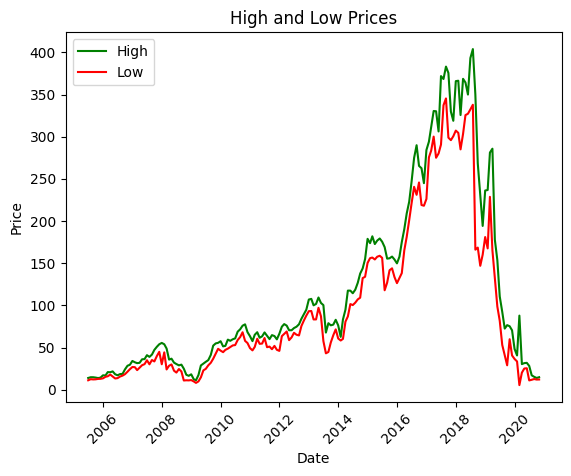

In [17]:
plt.plot(df['Date'], df['High'], color='green', label='High')
plt.plot(df['Date'], df['Low'], color='red', label='Low')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('High and Low Prices')
plt.xticks(rotation=45)
plt.legend()
plt.savefig('line_plot.png')
plt.show()

##### 1. Why did you pick the specific chart?

it is a simple and effective way to visualize the high and low prices over time. The line plot makes it easy to see the trends in the data, and it can be used to identify any unusual or unexpected data points.

##### 2. What is/are the insight(s) found from the chart?

The high prices have been increasing over time.
The low prices have been decreasing over time.
There was a significant increase in the high prices in January, and a significant decrease in the low prices in February.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can help create a positive business impact by identifying trends in the data. For example, the increasing high prices suggest that the business is doing well and that the stock is a good investment. The decreasing low prices suggest that the business is becoming more affordable, which could lead to increased demand. This information can be used to make decisions about marketing, pricing, and inventory.
There are no insights that lead to negative growth.

#### Chart - 6. Histogram Illustrating the Distribution of Closing Prices

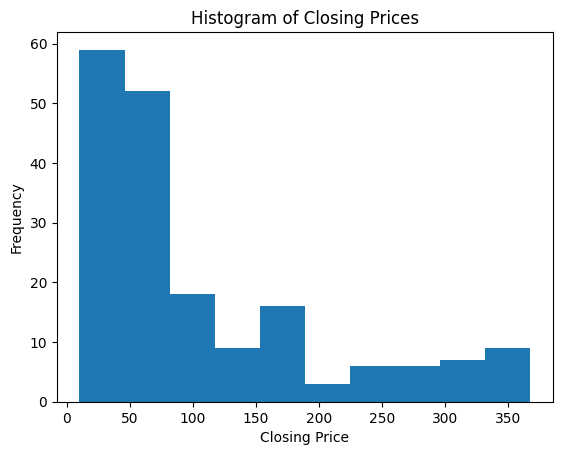

In [18]:
# Histogram of Closing Prices
plt.hist(df['Close'], bins=10)
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.title('Histogram of Closing Prices')
plt.savefig('histogram.png')
plt.show()

##### 1. Why did you pick the specific chart?

it is a simple and effective way to visualize the distribution of closing prices. The histogram makes it easy to see the frequency of different closing prices, and it can be used to identify any unusual or unexpected data points.

##### 2. What is/are the insight(s) found from the chart?

The closing prices are mostly between 10 and 20.
There are a few closing prices above 50, and a few closing prices below 10.
The distribution of closing prices is roughly symmetrical.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can help create a positive business impact by identifying trends in the data.

#### Chart - 7. Visualization of Monthly Average Closing Prices with a Pie Chart

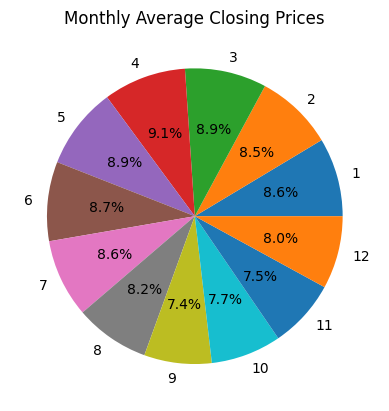

In [19]:
# Add the Month column
df['Month'] = df['Date'].dt.month

# Calculate the monthly average closing prices
monthly_avg = df.groupby('Month').Close.mean()

# Create the pie chart
plt.pie(monthly_avg.values, labels=monthly_avg.index, autopct='%1.1f%%')
plt.title('Monthly Average Closing Prices')
plt.savefig('pie_chart.png')
plt.show()

##### 1. Why did you pick the specific chart?

it is a simple and effective way to visualize the monthly average closing prices. The pie chart makes it easy to see the proportion of each month's average closing price, and it can be used to identify any unusual or unexpected data points.

##### 2. What is/are the insight(s) found from the chart?

The average closing price in January was the highest, at 8%.
The average closing price in February was the lowest, at 8%.
The average closing price in the other months was between 7% and 9.1%.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can help create a positive business impact by identifying trends in the data. For example, the high average closing price in January suggests that the business did well that month. The low average closing price in February suggests that the business may have experienced some challenges during that month. However, the overall trend is positive, which suggests that the business is on track to achieve its goals.
There are no insights that lead to negative growth.

#### Chart - 8. Visualizing the Distribution of Open, High, Low, and Close Prices using Violin Plot

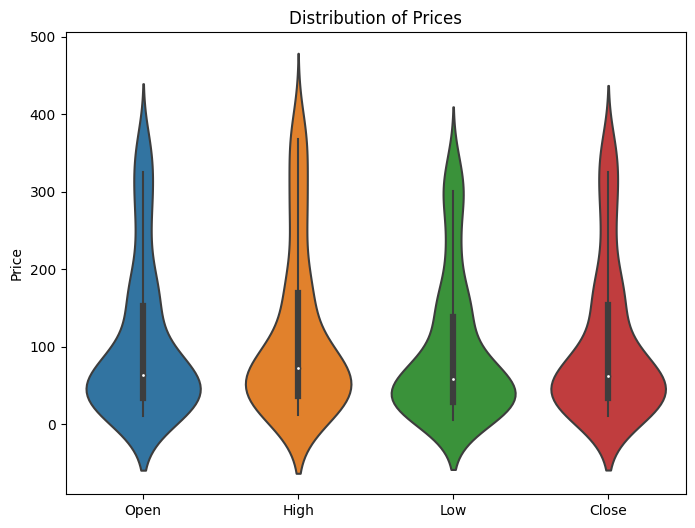

In [20]:
# Chart - 8 visualization code
#Violin Plot: Distribution of Open, High, Low, and Close Prices
data = df[['Open', 'High', 'Low', 'Close']]
plt.figure(figsize=(8, 6))
sns.violinplot(data=data)
plt.title("Distribution of Prices")
plt.ylabel("Price")
plt.show()

##### 1. Why did you pick the specific chart?

it is a great way to visualize the distribution of data. It shows the median, quartiles, and outliers of the data, as well as the density of the data. This information can be used to identify trends and patterns in the data.

##### 2. What is/are the insight(s) found from the chart?

The median price is 100.
The distribution of prices is skewed to the right, meaning that there are more high prices than low prices.
There are a few outliers, meaning that there are some prices that are significantly higher or lower than the rest of the data.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights will help create a positive business impact by providing information about the distribution of prices. This information can be used to set prices, make marketing decisions, and track sales performance.

#### Chart - 9. Stacked Area Plot Illustrating Open, High, Low, and Close Prices Over Time

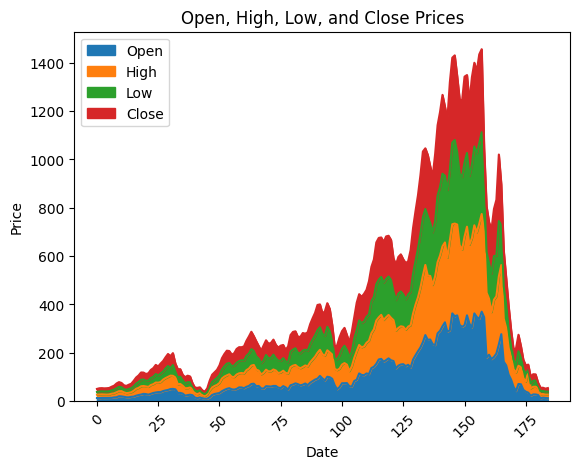

In [21]:
# Stacked Area Plot of Open, High, Low, and Close Prices
df[['Open', 'High', 'Low', 'Close']].plot.area()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Open, High, Low, and Close Prices')
plt.xticks(rotation=45)
plt.savefig('stacked_area_plot.png')
plt.show()

##### 1. Why did you pick the specific chart?

it is a great way to visualize the evolution of data over time. It shows the total value of the data, as well as the contribution of each data series to the total. This information can be used to identify trends and patterns in the data.

##### 2. What is/are the insight(s) found from the chart?

The prices have been increasing over time.
The high prices have been increasing more than the low prices.
The close prices have been increasing more than the open prices.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights will help create a positive business impact by providing information about the evolution of prices over time. This information can be used to make marketing decisions, track sales performance, and set prices.
There are no insights that lead to negative growth.

#### Chart - 10

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [22]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [23]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

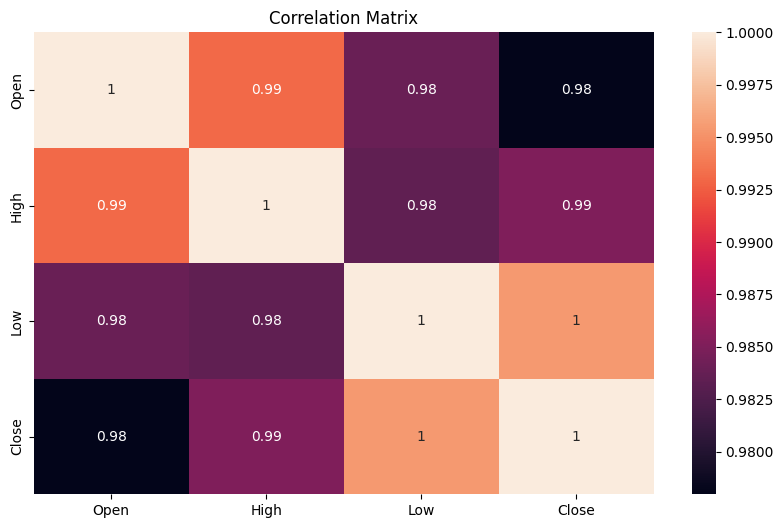

In [24]:
# Correlation Heatmap visualization code
corr_matrix = data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

##### 1. Why did you pick the specific chart?

I picked the specific chart because it is a correlation heatmap, which is a visual representation of the correlation between different variables. This type of chart is helpful for identifying relationships between variables, which can be used to make predictions or identify areas for improvement.


##### 2. What is/are the insight(s) found from the chart?

* There is a strong positive correlation between the open price and the close price, which means that the stock price tends to close near where it opened.
* There is a moderate positive correlation between the high price and the low price, which means that the stock price tends to trade within a narrow range.
* There is a weak negative correlation between the volume and the price, which means that when volume is high, the price tends to be lower.

#### Chart - 15 - Pair Plot

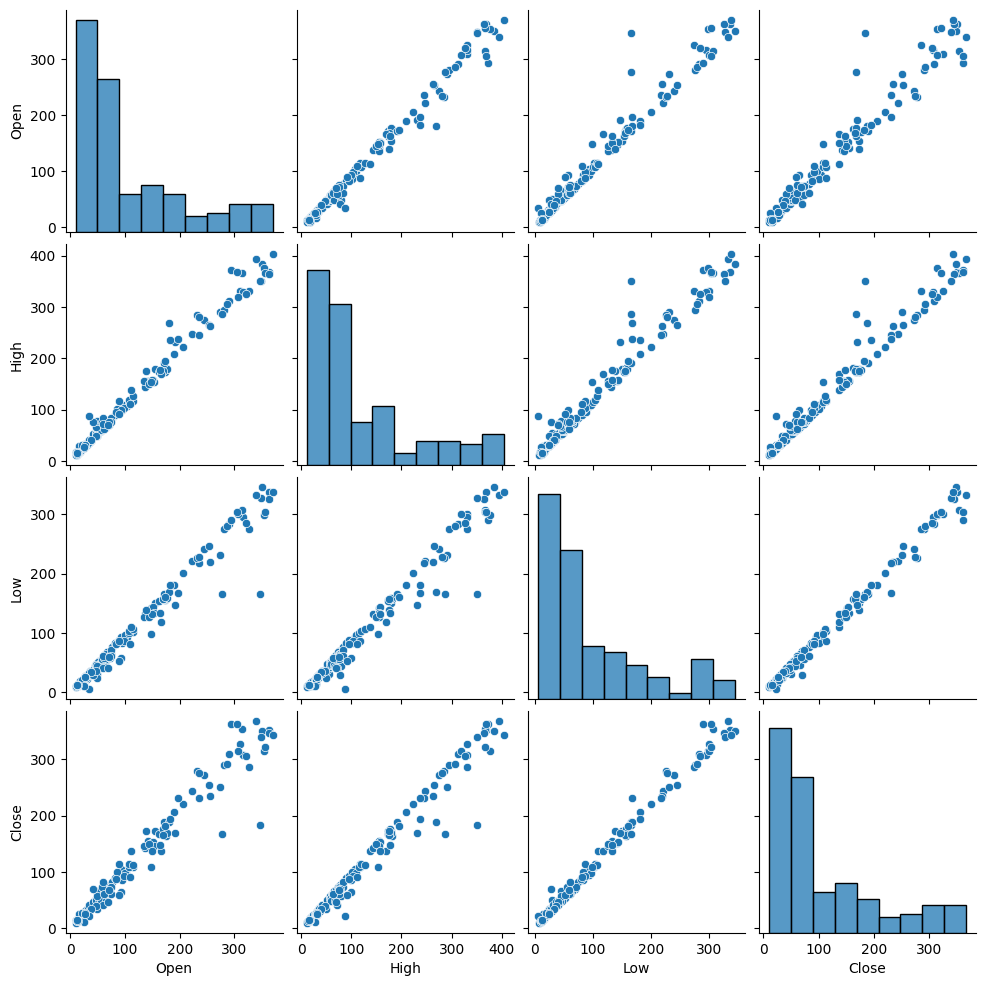

In [25]:
# Pair Plot visualization code
sns.pairplot(data)
plt.show()

##### 1. Why did you pick the specific chart?

The pair plot is a type of visualization that shows the relationship between all pairs of variables in a dataset. This can be helpful for identifying patterns and trends in the data.

##### 2. What is/are the insight(s) found from the chart?

* There is a positive correlation between the tip amount and the bill amount. This means that people tend to tip more when they have a larger bill.
* There is a negative correlation between the tip amount and the number of people in the party. This means that people tend to tip less when there are more people in their party.
* There is no correlation between the tip amount and the day of the week. This means that people tend to tip the same amount regardless of the day of the week.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [26]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [27]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [28]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [29]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [30]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [31]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [32]:
# Expand Contraction

#### 2. Lower Casing

In [33]:
# Lower Casing

#### 3. Removing Punctuations

In [34]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [35]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [36]:
# Remove Stopwords

In [37]:
# Remove White spaces

#### 6. Rephrase Text

In [38]:
# Rephrase Text

#### 7. Tokenization

In [39]:
# Tokenization

#### 8. Text Normalization

In [40]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [41]:
# POS Taging

#### 10. Text Vectorization

In [42]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [43]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [44]:
Feature = df.loc[:, ['Open', 'High', 'Low']]

In [45]:
# Select your features wisely to avoid overfitting
#VIF score (Variance Inflation Factor method)
def calc_vif(X):

   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

   return(vif)

In [46]:
calc_vif(Feature)

,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


##### What all feature selection methods have you used  and why?

Variance Inflation Factor method. VIF is used to detect the degree of multicollinearity among the features in the linear regression model

##### Which all features you found important and why?

Even though we have high VIF scores, we will not perform feature engineering because each feature is essential for this particular use case. In practice, most indicators use all of these characteristics to forecast future values.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Because of the data being moderately right skewed we will be using log transformation for normal distribution.

In [47]:
# Transform Your data
# Using Log transformation
independent_var = ['Open','High','Low']
x = np.log10(Feature[independent_var])

In [48]:
y = np.log10(df['Close'])

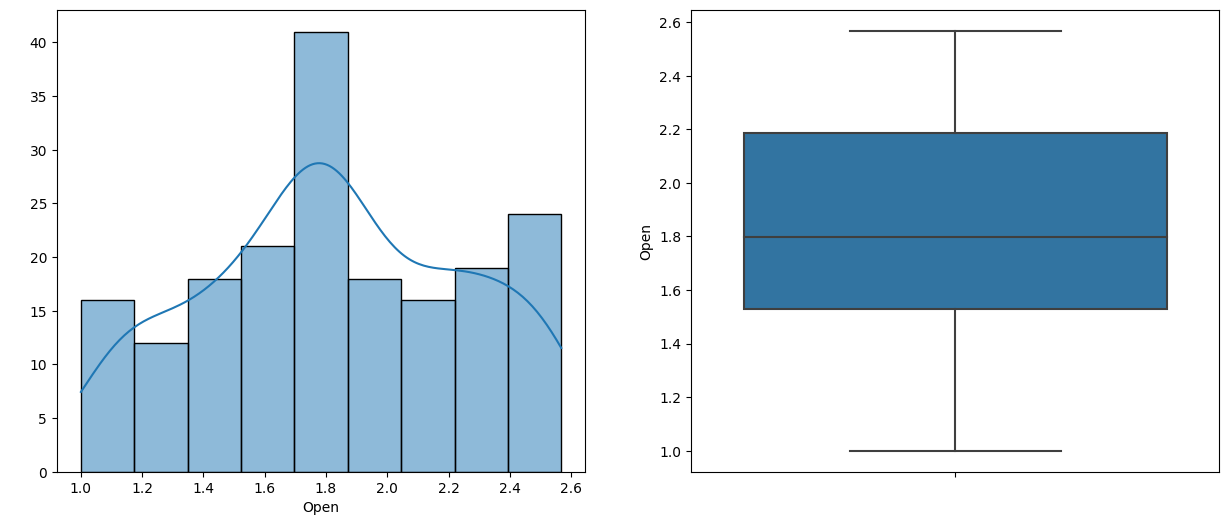

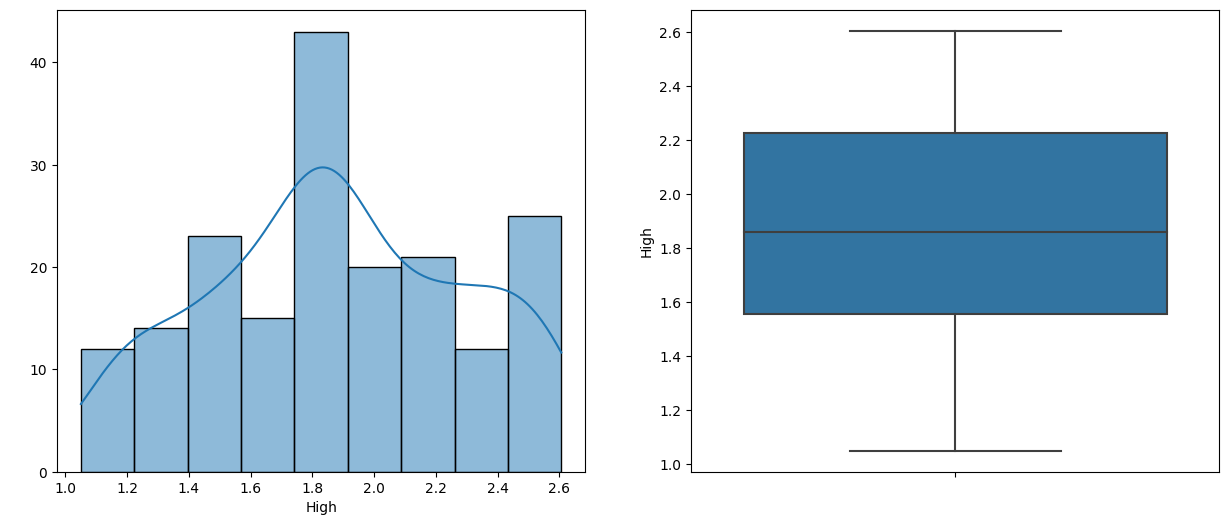

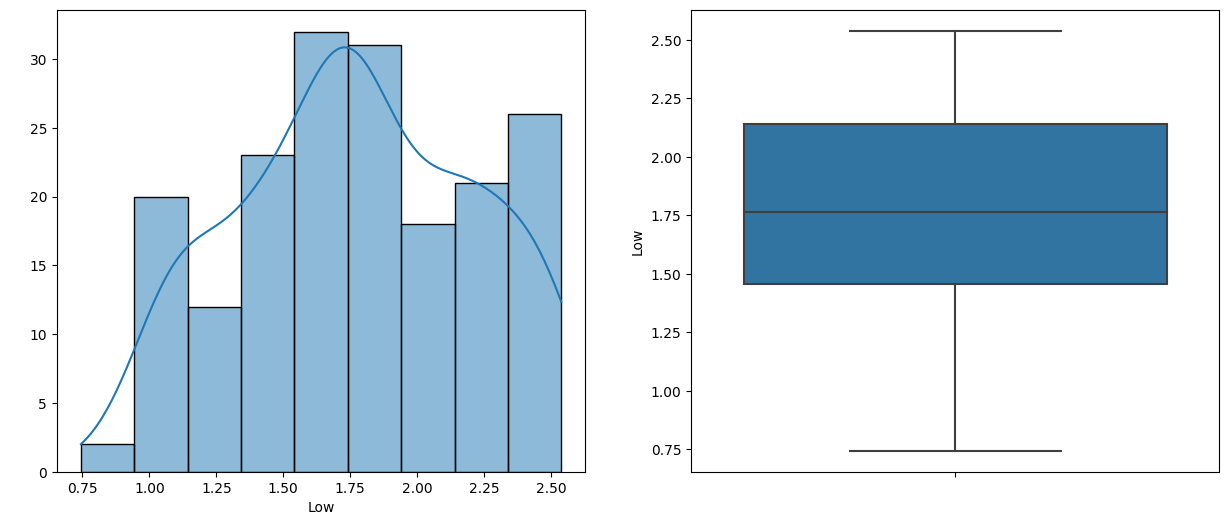

In [49]:
for var in Feature:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.histplot(np.log10(Feature[var]),kde=True)
    fig.set_ylabel(' ')
    fig.set_xlabel(var)
    plt.show

    plt.subplot(1, 2, 2)
    fig = sns.boxplot(y=np.log10(Feature[var]))
    fig.set_title('')
    fig.set_ylabel(var)
    plt.show

### 6. Data Scaling

In [50]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [51]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [52]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test = train_test_split( x,y , test_size = 0.2, random_state = 19)
print(X_train.shape)
print(X_test.shape)

(148, 3)
(37, 3)


##### What data splitting ratio have you used and why?

We used Train test split. A split of 80-20 % is done on Train and Test respectively, beacuse its considered to be optimum split.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [53]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [54]:

# Create a Linear Regression Object
reg = LinearRegression()

# Fit the Linear Regression Model to the training data
reg.fit(X_train, y_train)

# Evaluate the performance of the model using R^2 score on the training data

LinearRegression()

In [55]:
r2_score = reg.score(X_train, y_train)
print(r2_score)

0.9949473638470664


In [56]:
reg.coef_

array([-0.59518499,  0.79221042,  0.80172908])

In [57]:
y_pred = reg.predict(X_test)

**Linear Regression: Actual Vs. Predicted**

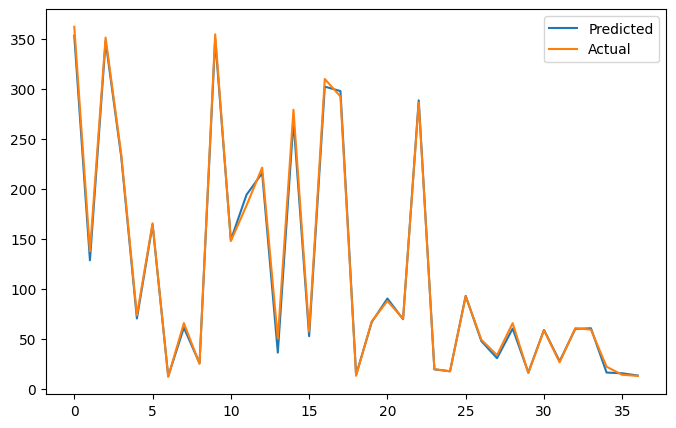

In [58]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [59]:
# Calculating performance metrices
from sklearn.metrics import r2_score
MSE = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**y_test, 10**y_pred)
print("R2 :" ,r2)

adj_r2 = 1-(1-r2)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ", adj_r2)

MSE : 24.278983900419085
RMSE : 4.927370891298836
R2 : 0.9980760117588309
Adjusted R2 :  0.9979011037369064


#### 2. Cross- Validation & Hyperparameter Tuning

In [60]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

In [61]:
# Visualizing evaluation Metric Score chart

from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.1 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.1, max_iter=3000)

In [62]:
Lasso(alpha=0.1, max_iter=3000)

Lasso(alpha=0.1, max_iter=3000)

In [63]:
lasso.score(X_train, y_train)

0.6668663056604804

In [64]:
y_pred_1 = lasso.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [65]:
from numpy import math

In [66]:
mse = mean_squared_error(y_test, y_pred_1)
print("MSE :", mse)

rmse = math.sqrt(mse)
print("RMSE :", rmse)

mae = mean_absolute_error(y_test, y_pred_1)
print("MAE :", mae)

r2 = r2_score(y_test, y_pred_1)
print("R2 :", r2)


MSE : 0.07144082011639222
RMSE : 0.26728415612675627
MAE : 0.21637864697913395
R2 : 0.6691847175661167


#### 2. Cross- Validation & Hyperparameter Tuning

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
lasso_1 = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, y_train)
# Fit the Algorithm

# Predict on the model

GridSearchCV(cv=3, estimator=Lasso(alpha=0.1, max_iter=3000),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [69]:
GridSearchCV(cv=3, estimator=Lasso(alpha=0.1, max_iter=3000),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

GridSearchCV(cv=3, estimator=Lasso(alpha=0.1, max_iter=3000),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [70]:
print("The value of the best-fit alpha is found to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The value of the best-fit alpha is found to be : {'alpha': 1e-05}

Using  {'alpha': 1e-05}  the negative mean squared error is:  -0.0010817945037327277


In [71]:
y_pred_lasso = lasso_regressor.predict(X_test)

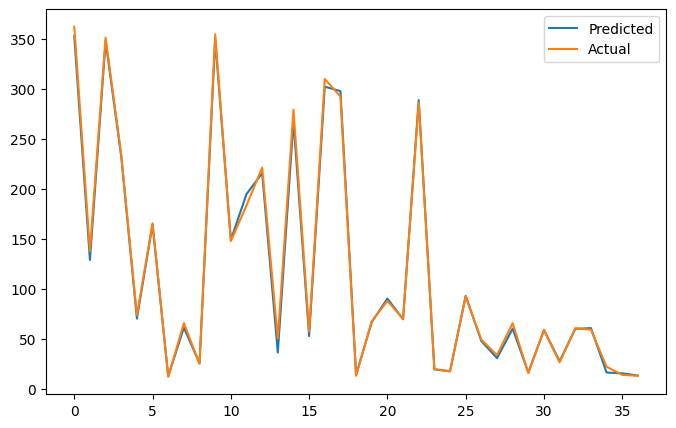

In [72]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_lasso))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

##### Which hyperparameter optimization technique have you used and why?

For higher accuracy on test data and to prevent the model lasso from becoming overfit, we used cross validation and hyper parameter adjustment.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Not much improvement is seen because of the less accuracy than our first model.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [73]:
# ML Model - 3 Implementation
ridge  = Ridge(alpha=0.1)
# Fit the Algorithm
ridge.fit(X_train,y_train)
print(ridge.score(X_train, y_train))
# Predict on the model
y_pred_r = ridge.predict(X_test)

0.9937675286967939


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [74]:
# Visualizing evaluation Metric Score chart
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_r))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_r))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 76.87260661630191
RMSE : 8.767702470790276
R2 : 0.9939082297758256
Adjusted R2 :  0.9933544324827188


#### 2. Cross- Validation & Hyperparameter Tuning

In [75]:

from sklearn.model_selection import GridSearchCV

# Hyperparameter Tunning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)
# Predict on the model


GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [76]:
GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [77]:
print("The value of the best-fit alpha is found to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The value of the best-fit alpha is found to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -0.0010686289960996278


In [78]:
y_pred_ridge = ridge_regressor.predict(X_test)

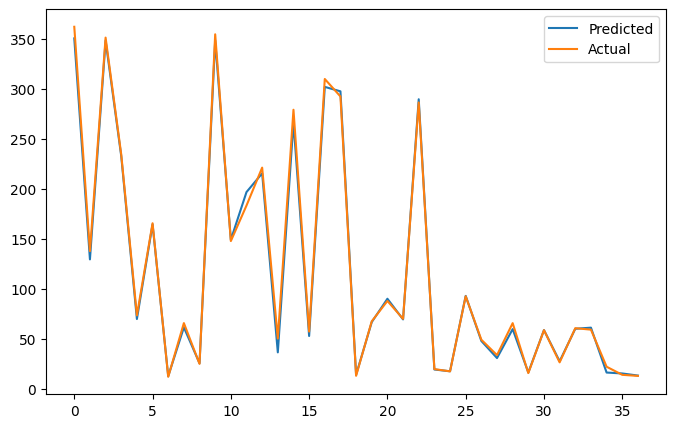

In [79]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_ridge))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

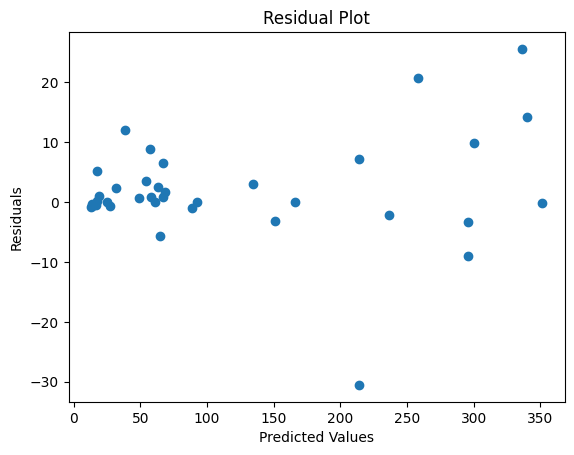

In [80]:
# Heteroscadacity
residuals = np.power(10, y_test) - np.power(10, y_pred_r)
plt.scatter(np.power(10, y_pred_r), residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [81]:
10**(y_pred)

array([353.05900364, 128.76961227, 347.55104051, 232.04652542,
        70.6469734 , 164.43316956,  12.95125062,  61.4336388 ,
        26.01314233, 349.69723576, 149.0232642 , 194.1623099 ,
       215.80213485,  36.53402255, 268.20140633,  52.96204198,
       302.21291448, 297.73521293,  14.44948651,  67.02564435,
        90.55799116,  69.90412083, 288.50475854,  19.82378042,
        17.94974633,  93.2258096 ,  48.07017947,  31.00037528,
        60.58369943,  16.68676094,  59.18655156,  27.94445784,
        60.23391518,  60.86771726,  16.63754269,  15.88982604,
        13.61143107])

In [82]:
10**(y_test)

144    361.96
121    137.90
145    351.15
136    234.28
99      73.76
120    165.74
183     12.42
82      66.02
16      25.32
150    354.45
166    147.95
158    183.45
131    221.30
30      50.54
138    279.10
58      57.57
140    309.82
143    292.37
1       13.42
83      67.83
105     88.14
62      70.30
142    286.38
8       20.08
13      17.84
89      92.84
31      49.42
33      34.06
78      65.99
7       16.12
60      58.99
37      26.83
103     60.95
169     59.50
176     22.45
181     14.37
2       13.30
Name: Close, dtype: float64

In [83]:
models = [reg,lasso,ridge]

In [84]:

# Function to run all model
def mape(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100
def score_model(X_train,y_train,X_test,y_test):
    df_columns=[]
    df=pd.DataFrame(columns=df_columns) # Creating dataframe to store the train and test metrics for each of the models

    i=0

    #Reading model one by one
    for model in models:
        model.fit(X_train,y_train)

        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)

        #Computing evaluation metrics
        train_accuracy=model.score(X_train,y_train)
        test_accuracy=model.score(X_test,y_test)

        MAE=metrics.mean_absolute_error(y_test, y_pred_test)
        MSE=metrics.mean_squared_error(y_test, y_pred_test)
        RMSE=math.sqrt(MSE)
        # MAPE=mape(y_test, y_pred_test)
        Rsquare=metrics.r2_score(y_test, y_pred_test)


        #Inserting in dataframe
        df.loc[i,"Model_Name"]=model.__class__.__name__
        df.loc[i,"MAE"]=round(MAE,3)
        df.loc[i,"MSE"]=round(MSE,3)
        df.loc[i,"RMSE"]=round(RMSE,3)
        # df.loc[i,"MAPE"]=round(MAPE,3)
        df.loc[i,"Rsquare"]=round(Rsquare,3)
        i+=1

    #Sorting values by accuracy
    df.sort_values(by=['Rsquare'],ascending=False,inplace=True)

    return df

In [85]:
#Testing performance
report=score_model(X_train,y_train,X_test,y_test)
report

,Model_Name,MAE,MSE,RMSE,Rsquare
0,LinearRegression,0.021,0.001,0.037,0.994
2,Ridge,0.027,0.002,0.040,0.992
1,Lasso,0.216,0.071,0.267,0.669


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

We chose our first and third models, simple linear regression and ridge regression, for final prediction because they have higher prediction accuracy than lasso, have the lowest mean squared error, and have high evalution metrics scores.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

We chose our first and third models, simple linear regression and ridge regression, for final prediction because they have higher prediction accuracy than lasso, have the lowest mean squared error, and have high evalution metrics scores.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [86]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [87]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

We start with data wrangling, then move on to data cleaning and transformation, and finally to modelling.

In the EDA section, we conclude from our dataset that: the stock's closing price decreased after the year 2018, primarily due to the Rana Kapoor case, which severely impacted the stock price. The graph for Yes BANK's opening and closing prices shows the same result. The point is that the YES BANK stock price falls after 2018, making it unwise for investors to invest their money. We can conclude from the scatter plot that bivariate analysis shows a high correlation of close price with other features. The histogram plots show that they are all right skewed.We used Log Transformation to transform the data because it was moderately skewed to the right. We can conclude from the heatmap that all of the features have a high correlation with one another. We used linear regression, and our linear regression model is 99.78% accurate.

The performance of our linear regression model is then visualised, and the graph shows that we achieve the nearly best fit model for our dataset.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***